In [1]:
!pip install psycopg2
!pip install sqlalchemy
!pip install statsmodels
!pip install scipy
!pip install seaborn
!pip install matplotlib



In [2]:
import pandas as pd
import sys
import os
import statsmodels
from scipy import stats
sys.path.append(os.path.abspath('../scripts'))

In [3]:
from data_load import load_data_using_sqlalchemy, calculate_missing_percentage

In [4]:
query = "SELECT * FROM xdr_data;"  # Replace with your actual table name

# Load data from PostgreSQL using SQLAlchemy
df = load_data_using_sqlalchemy(query)

# Display the first few rows of the dataframe
if df is not None:
    print("Successfully loaded the data")
else:
    print("Failed to load data.")
    
df.sample(7)

Successfully loaded the data


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
74564,7.277826e+18,4/26/2019 9:05,215.0,4/27/2019 9:05,192.0,86399.0,2.082017e+14,3.378696e+10,3.540531e+13,T62357A,...,807139.0,13397773.0,16266183.0,16482782.0,645065738.0,15091164.0,784428710.0,16219753.0,65745735.0,667715375.0
31045,7.349883e+18,4/24/2019 15:15,500.0,4/26/2019 3:09,1.0,129235.0,2.082010e+14,3.364649e+10,3.532851e+13,T12842B,...,4317603.0,19265267.0,17204880.0,5937215.0,801962600.0,798789.0,781253951.0,6882682.0,37627097.0,834503590.0
15090,1.311448e+19,4/24/2019 18:49,905.0,4/24/2019 23:45,559.0,17790.0,2.082019e+14,3.368717e+10,3.592041e+13,T76896B,...,21488034.0,8045920.0,21396452.0,132444.0,183965744.0,9845391.0,799530661.0,7696725.0,27277163.0,234334958.0
8527,7.277826e+18,4/24/2019 15:21,752.0,4/25/2019 3:35,464.0,44029.0,2.082003e+14,3.366579e+10,3.595001e+13,D10329B,...,15573407.0,21077761.0,13572059.0,255003.0,745953743.0,2005423.0,636883773.0,13845558.0,40813889.0,781701226.0
77950,1.304243e+19,4/27/2019 2:53,18.0,4/28/2019 1:38,85.0,81893.0,2.082014e+14,3.366076e+10,8.637690e+13,T85946A,...,23137758.0,12446170.0,5811552.0,9485801.0,286231618.0,9010118.0,500956665.0,919555.0,34336263.0,328499616.0
61442,1.304243e+19,4/26/2019 4:39,36.0,4/27/2019 4:39,24.0,86399.0,2.082017e+14,3.366034e+10,8.637690e+13,D79757A,...,22118834.0,8809021.0,22206686.0,3745095.0,400541467.0,6106811.0,331638677.0,12212888.0,31980351.0,448664385.0
34157,1.311448e+19,4/24/2019 23:11,192.0,4/26/2019 8:03,362.0,118343.0,2.082010e+14,3.366688e+10,3.586241e+13,D40083C,...,3553419.0,20782443.0,11509974.0,3604469.0,136527367.0,13373724.0,617186808.0,11138856.0,52318222.0,160344332.0


In [5]:
calculate_missing_percentage(df)

,Missing Values,Percentage
Bearer Id,991,0.660662
Start,1,0.000667
Start ms,1,0.000667
End,1,0.000667
End ms,1,0.000667
Dur. (ms),1,0.000667
IMSI,570,0.379997
MSISDN/Number,1066,0.710662
IMEI,572,0.381331
Last Location Name,1153,0.768662


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [7]:
# using if clause IMSI, MSISDN/Number not to substitute missed value



# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

# Impute numerical columns with mean
numerical_cols = df.select_dtypes(include=['float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

df = df.dropna()

# Check for remaining missing values
print(df.isnull().sum())


Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250

In [8]:
df.shape

(148837, 45)

In [9]:
df.sample(7)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
125131,7.349883e+18,4/23/2019 18:22,199.0,4/30/2019 11:38,338.0,580561.0,2.082098e+14,3.366572e+10,3.535661e+13,L72184B,...,16236604.0,4319584.0,9143207.0,4515689.0,275833649.0,3321980.0,206885964.0,336339.0,16347548.0,311384538.0
104248,7.349883e+18,4/27/2019 8:40,722.0,4/29/2019 7:29,632.0,168501.0,2.082010e+14,3.362570e+10,3.520621e+13,D22190C,...,16226146.0,21562261.0,7528426.0,18771506.0,336126617.0,650422.0,85802004.0,14442469.0,59776937.0,369179992.0
136451,7.349883e+18,4/29/2019 1:00,561.0,4/30/2019 8:16,307.0,112548.0,2.082010e+14,3.376297e+10,3.554121e+13,D11840A,...,10533491.0,658908.0,16190771.0,8357369.0,5451899.0,10309226.0,15195174.0,7035075.0,27203579.0,33836921.0
87832,7.277826e+18,4/27/2019 12:59,53.0,4/28/2019 7:20,594.0,66045.0,2.082019e+14,3.370000e+10,8.635410e+13,D17590A,...,12162295.0,6688148.0,2027904.0,20547020.0,422437859.0,222130.0,392287422.0,3930356.0,32628264.0,448438156.0
131379,7.349883e+18,4/28/2019 13:05,920.0,4/30/2019 8:45,823.0,157203.0,2.082014e+14,3.362619e+10,3.573651e+13,D15081B,...,11729493.0,19777718.0,21429927.0,20096451.0,702007999.0,12916142.0,442040367.0,7174419.0,60852364.0,745201726.0
75560,1.311448e+19,4/26/2019 15:45,205.0,4/28/2019 5:23,76.0,135432.0,2.082003e+14,3.362261e+10,3.554001e+13,D70706A,...,2290030.0,640553.0,14608523.0,6280185.0,256654375.0,9272400.0,149881108.0,10629610.0,30353559.0,287850111.0
21805,7.349883e+18,4/24/2019 20:26,630.0,4/25/2019 0:01,205.0,12885.0,2.082014e+14,3.369869e+10,3.565581e+13,D10180C,...,19606491.0,11922937.0,10869974.0,3082912.0,712050133.0,8924497.0,533935106.0,15909381.0,42778213.0,749265549.0


In [10]:
# Group by user identifier (e.g., 'IMSI')
# Count the number of xDR sessions per user

xdr_sessions_per_user = df.groupby('IMSI').size().reset_index(name='Number_of_xDR_Sessions')
print(xdr_sessions_per_user.sample(7))


                IMSI  Number_of_xDR_Sessions
45111   2.082015e+14                       1
35832   2.082014e+14                       1
106415  2.082099e+14                       1
83453   2.082018e+14                       1
40557   2.082014e+14                       1
99944   2.082021e+14                       2
50402   2.082015e+14                       2


In [11]:
# Group by the user identifier (e.g., 'IMSI') and sum the session durations
# Replace 'Dur. (ms)' with the actual column name representing session duration
total_session_duration_per_user = df.groupby('IMSI')['Dur. (ms)'].sum().reset_index(name='Total_Session_Duration_ms')

# Display the result
print(total_session_duration_per_user.head())

           IMSI  Total_Session_Duration_ms
0  2.040471e+14                   869844.0
1  2.040808e+14                   877385.0
2  2.082001e+14                    86019.0
3  2.082001e+14                    86254.0
4  2.082001e+14                   573923.0


In [12]:
# Group by the user identifier (e.g., 'IMSI') and sum the download and upload data
total_data_per_user = df.groupby('IMSI')[['Total DL (Bytes)', 'Total UL (Bytes)']].sum().reset_index()

# Rename the columns for better clarity
total_data_per_user.columns = ['IMSI', 'Total_DL_Bytes', 'Total_UL_Bytes']

# Display the result
print(total_data_per_user.head())

           IMSI  Total_DL_Bytes  Total_UL_Bytes
0  2.040471e+14      78697597.0      60456049.0
1  2.040808e+14     194828056.0      37295915.0
2  2.082001e+14      31376981.0      53794658.0
3  2.082001e+14     392918313.0      33583272.0
4  2.082001e+14     961767023.0      71325004.0


In [13]:
# List of application data volume columns (Download and Upload)
app_columns = [
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)',
    'Email DL (Bytes)', 'Email UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)'
]

# Group by the user identifier (e.g., 'IMSI') and sum the data volume for each application
total_app_data_per_user = df.groupby('IMSI')[app_columns].sum().reset_index()

# Rename the columns for better clarity (optional)
total_app_data_per_user.columns = ['IMSI'] + [f'Total_{col.replace(" (Bytes)", "")}' for col in app_columns]

# Display the result
print(total_app_data_per_user.head())

           IMSI  Total_Social Media DL  Total_Social Media UL  \
0  2.040471e+14              1500145.0                45943.0   
1  2.040808e+14               668596.0                46628.0   
2  2.082001e+14              3073697.0                49084.0   
3  2.082001e+14              2542767.0                34337.0   
4  2.082001e+14              3326811.0                99905.0   

   Total_Youtube DL  Total_Youtube UL  Total_Netflix DL  Total_Netflix UL  \
0        18980320.0        21960390.0        21621336.0         7224894.0   
1         9839889.0         2120016.0        10340908.0        16251392.0   
2         5556563.0        14325876.0        15305361.0        16525201.0   
3        22414714.0         3242918.0        10065639.0        17720213.0   
4         4046597.0         9793604.0        30748449.0        26594966.0   

   Total_Google DL  Total_Google UL  Total_Email DL  Total_Email UL  \
0        5985089.0        3233558.0       2518425.0        812549.0   
1   

In [14]:
# List of numeric columns
numeric_columns = ['Dur. (ms).1', 'Activity Duration UL (ms)', 'Activity Duration DL (ms)',
                   'UL TP > 300 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)',
                   '10 Kbps < UL TP < 50 Kbps (%)', 'UL TP < 10 Kbps (%)',
                   'DL TP > 1 Mbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
                   '50 Kbps < DL TP < 250 Kbps (%)', 'DL TP < 50 Kbps (%)',
                   'Avg Bearer TP UL (kbps)', 'Avg Bearer TP UL (kbps)',
                   'Avg RTT UL (ms)', 'Avg RTT DL (ms)', 'Dur. (ms)',
                   'End ms', 'End', 'Start ms', 'Start', 'Social Media DL (Bytes)', 
                   'Social Media UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
                   'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Google DL (Bytes)', 
                   'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 
                   'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 
                   'Other UL (Bytes)']

# Convert each column to numeric, applying errors='coerce' to handle non-numeric values
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Apply Z-score
z_scores = stats.zscore(df[numeric_columns], nan_policy='omit')

# Define a threshold (e.g., 3 standard deviations away)
threshold = 3
outliers = (abs(z_scores) > threshold)

# View outliers (True = Outlier)
df_outliers = df[outliers.any(axis=1)]
print(df_outliers)

           Bearer Id  Start  Start ms  End  End ms  Dur. (ms)          IMSI  \
0       1.311448e+19    NaN     770.0  NaN   662.0  1823652.0  2.082014e+14   
1       1.311448e+19    NaN     235.0  NaN   606.0  1365104.0  2.082019e+14   
2       1.311448e+19    NaN       1.0  NaN   652.0  1361762.0  2.082003e+14   
3       1.311448e+19    NaN     486.0  NaN   171.0  1321509.0  2.082014e+14   
4       1.311448e+19    NaN     565.0  NaN   954.0  1089009.0  2.082014e+14   
...              ...    ...       ...  ...     ...        ...           ...   
149979  1.304243e+19    NaN     139.0  NaN   123.0    86399.0  2.082019e+14   
149980  1.304243e+19    NaN     227.0  NaN   988.0   112955.0  2.082019e+14   
149982  6.917538e+18    NaN     982.0  NaN    97.0    86397.0  2.082009e+14   
149990  1.304243e+19    NaN     438.0  NaN    83.0    83844.0  2.082014e+14   
149995  1.304243e+19    NaN     615.0  NaN   407.0    59587.0  2.082014e+14   

        MSISDN/Number          IMEI     Last Locati

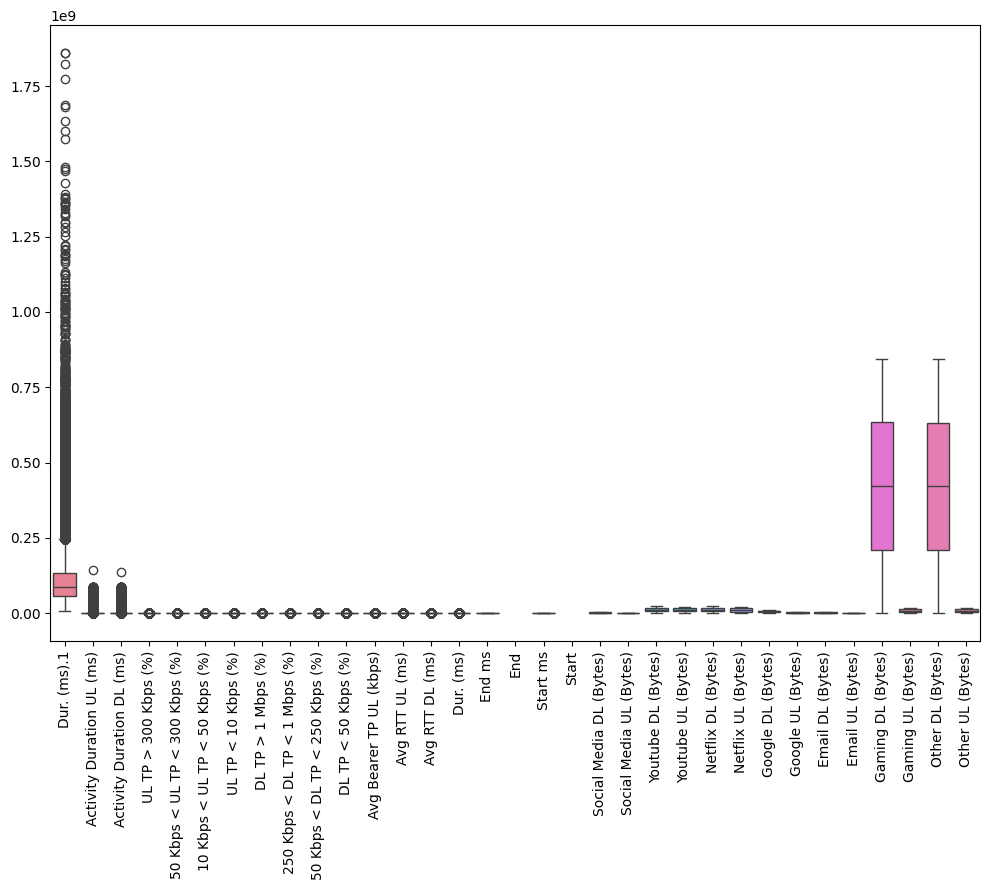

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_columns])
plt.xticks(rotation=90)
plt.show()

In [16]:
# Remove rows with outliers
df_cleaned = df[~outliers.any(axis=1)]


In [17]:
# Re-check for outliers
z_scores_after = stats.zscore(df_cleaned[numeric_columns])
outliers_after = (abs(z_scores_after) > threshold)
df_outliers_after = df_cleaned[outliers_after.any(axis=1)]
print("Number of outliers after treatment:", len(df_outliers_after))


Number of outliers after treatment: 20748


In [19]:
# Assuming the data frame has the following columns: 
# 'Dur. (ms)' for session duration, 'Total DL (Bytes)' for total download, and 'Total UL (Bytes)' for total upload.

# Step 1: Create a 'Total Duration' column by summing all session durations for each user
df_cleaned['Total Duration'] = df_cleaned.groupby('IMEI')['Dur. (ms)'].transform('sum')

# Step 2: Segment users into deciles based on 'Total Duration'
# Only taking the top 5 deciles
df_cleaned['Decile Class'] = pd.qcut(df_cleaned['Total Duration'], 10, labels=False)

# Filter for top 5 deciles (5, 6, 7, 8, 9)
top_five_deciles = df_cleaned[df_cleaned['Decile Class'] >= 5]

# Step 3: Calculate Total Data (DL + UL) per user
df_cleaned['Total Data (Bytes)'] = df_cleaned['Total DL (Bytes)'] + df_cleaned['Total UL (Bytes)']

# Step 4: Compute total data per decile class
decile_totals = top_five_deciles.groupby('Decile Class')['Total Data (Bytes)'].sum()

# View the result
print(decile_totals)

C:\Users\ephre\AppData\Local\Temp\ipykernel_40504\1066987519.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Total Duration'] = df_cleaned.groupby('IMEI')['Dur. (ms)'].transform('sum')
C:\Users\ephre\AppData\Local\Temp\ipykernel_40504\1066987519.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Decile Class'] = pd.qcut(df_cleaned['Total Duration'], 10, labels=False)
C:\Users\ephre\AppData\Local\Temp\ipykernel_40504\1066987519.py:15: SettingWithCopyWarning: 
A value is trying to

KeyError: 'Column not found: Total Data (Bytes)'

In [ ]:
# Convert all columns to numeric, coercing errors
df_cleaned = df.apply(pd.to_numeric, errors='coerce')


mean_values = df_cleaned.mean()
median_values = df_cleaned.median()
std_dev_values = df_cleaned.std()
variance_values = df_cleaned.var()

print("Mean Values:\n", mean_values)
print("\n\nMedian Values:\n", median_values)
print("\n\nStandard Deviation:\n", std_dev_values)
print("\n\nVariance:\n", variance_values)


Mean Values:
 Bearer Id                         1.013886e+19
Start                                      NaN
Start ms                          4.991637e+02
End                                        NaN
End ms                            4.986786e+02
Dur. (ms)                         1.050161e+05
IMSI                              2.082016e+14
MSISDN/Number                     4.191531e+10
IMEI                              4.847882e+13
Last Location Name                1.962290e+16
Avg RTT DL (ms)                   1.065846e+02
Avg RTT UL (ms)                   1.766843e+01
Avg Bearer TP DL (kbps)           1.331421e+04
Avg Bearer TP UL (kbps)           1.771482e+03
DL TP < 50 Kbps (%)               9.285686e+01
50 Kbps < DL TP < 250 Kbps (%)    3.058231e+00
250 Kbps < DL TP < 1 Mbps (%)     1.716619e+00
DL TP > 1 Mbps (%)                1.612421e+00
UL TP < 10 Kbps (%)               9.853094e+01
10 Kbps < UL TP < 50 Kbps (%)     7.766721e-01
50 Kbps < UL TP < 300 Kbps (%)    1.484084e-01

IndexError: index 27 is out of bounds for axis 0 with size 27

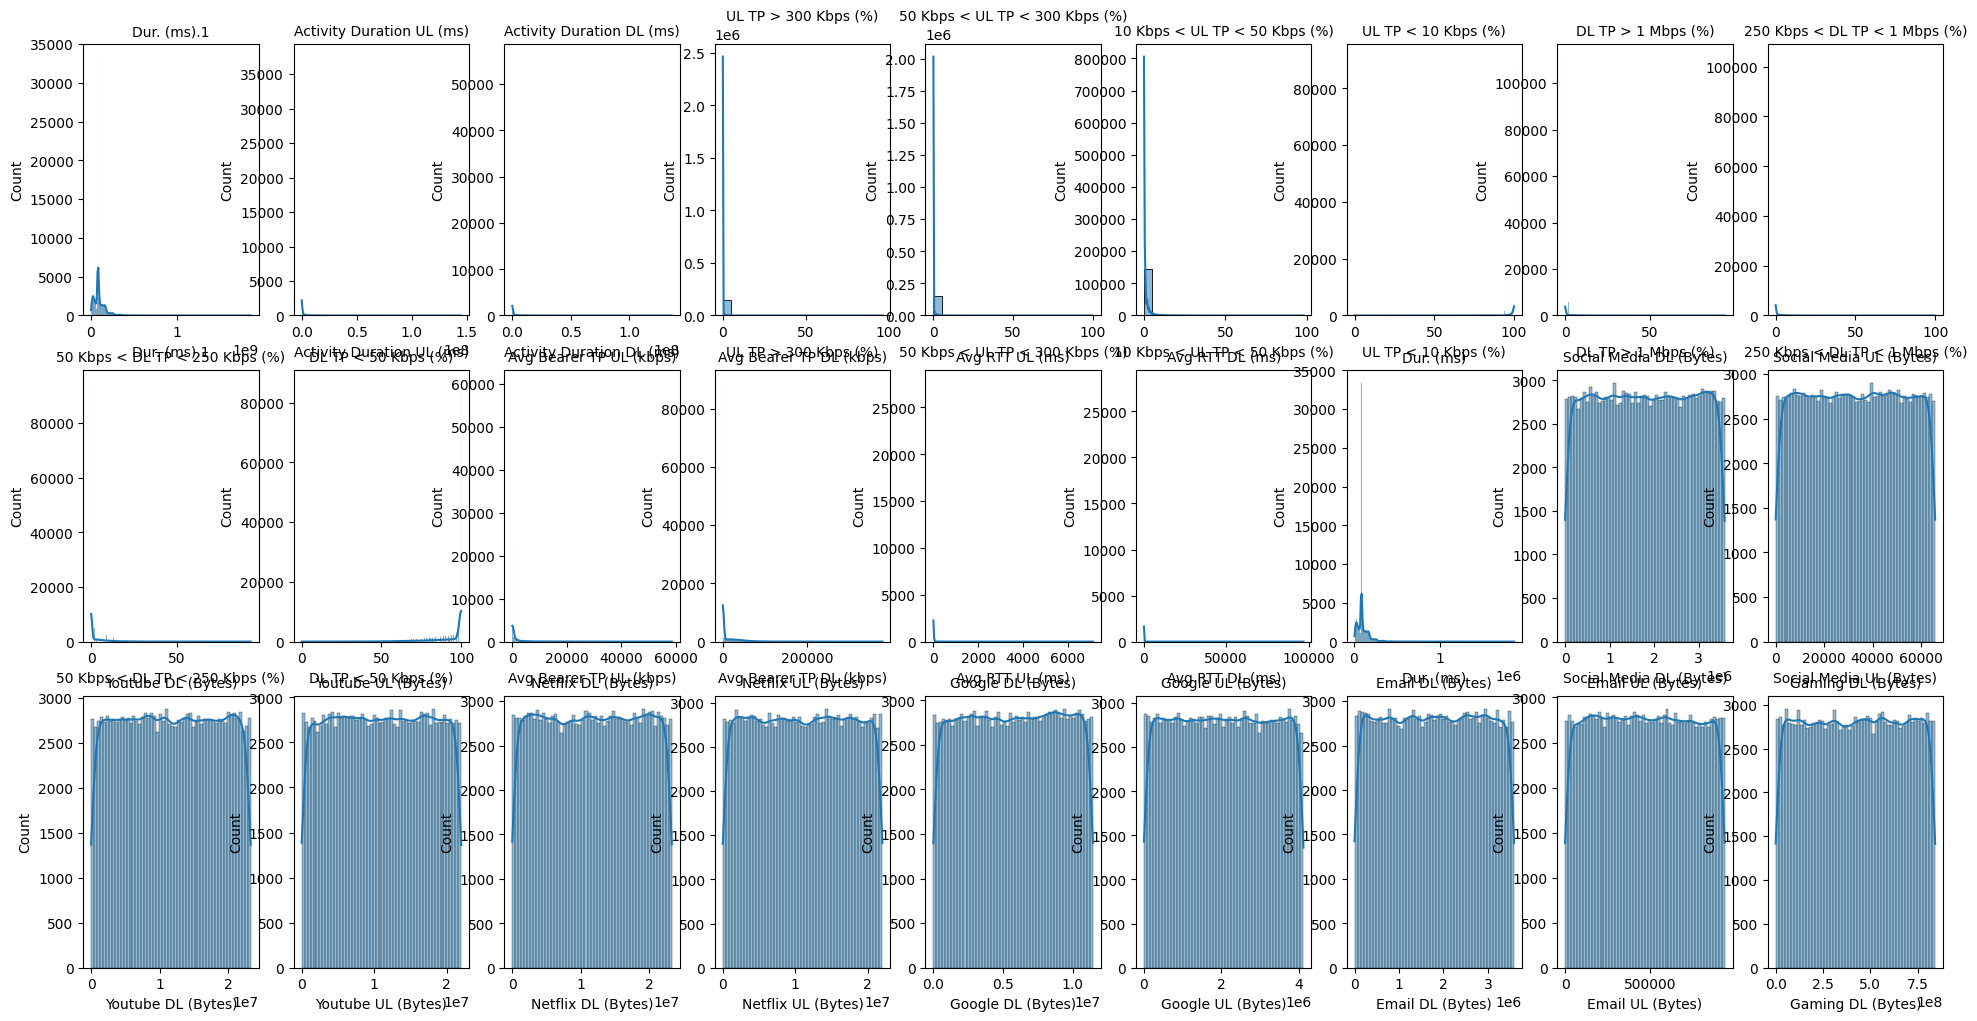

In [ ]:
# Define the figure size and matrix dimensions (e.g., 3 rows x 9 columns for 27 plots)
fig, axes = plt.subplots(nrows=3, ncols=9, figsize=(24, 12))

# Flatten the axes for easy iteration
axes = axes.flatten()

# List of variables to plot
variables = ['Dur. (ms).1','Activity Duration UL (ms)', 'Activity Duration DL (ms)', 
             'UL TP > 300 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 
             '10 Kbps < UL TP < 50 Kbps (%)', 'UL TP < 10 Kbps (%)', 
             'DL TP > 1 Mbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 
             '50 Kbps < DL TP < 250 Kbps (%)', 'DL TP < 50 Kbps (%)',
             'Avg Bearer TP UL (kbps)', 'Avg Bearer TP DL (kbps)', 
             'Avg RTT UL (ms)', 'Avg RTT DL (ms)', 'Dur. (ms)',
             'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 
             'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
             'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
             'Google DL (Bytes)', 'Google UL (Bytes)',
             'Email DL (Bytes)', 'Email UL (Bytes)',
             'Gaming DL (Bytes)', 'Gaming UL (Bytes)']

# Loop through variables and plot the corresponding graph
for i, var in enumerate(variables):
    sns.histplot(df_cleaned[var], kde=True, ax=axes[i])  # Example with Histogram + KDE
    axes[i].set_title(var, fontsize=10)
    
# Adjust layout
plt.tight_layout()
plt.show()

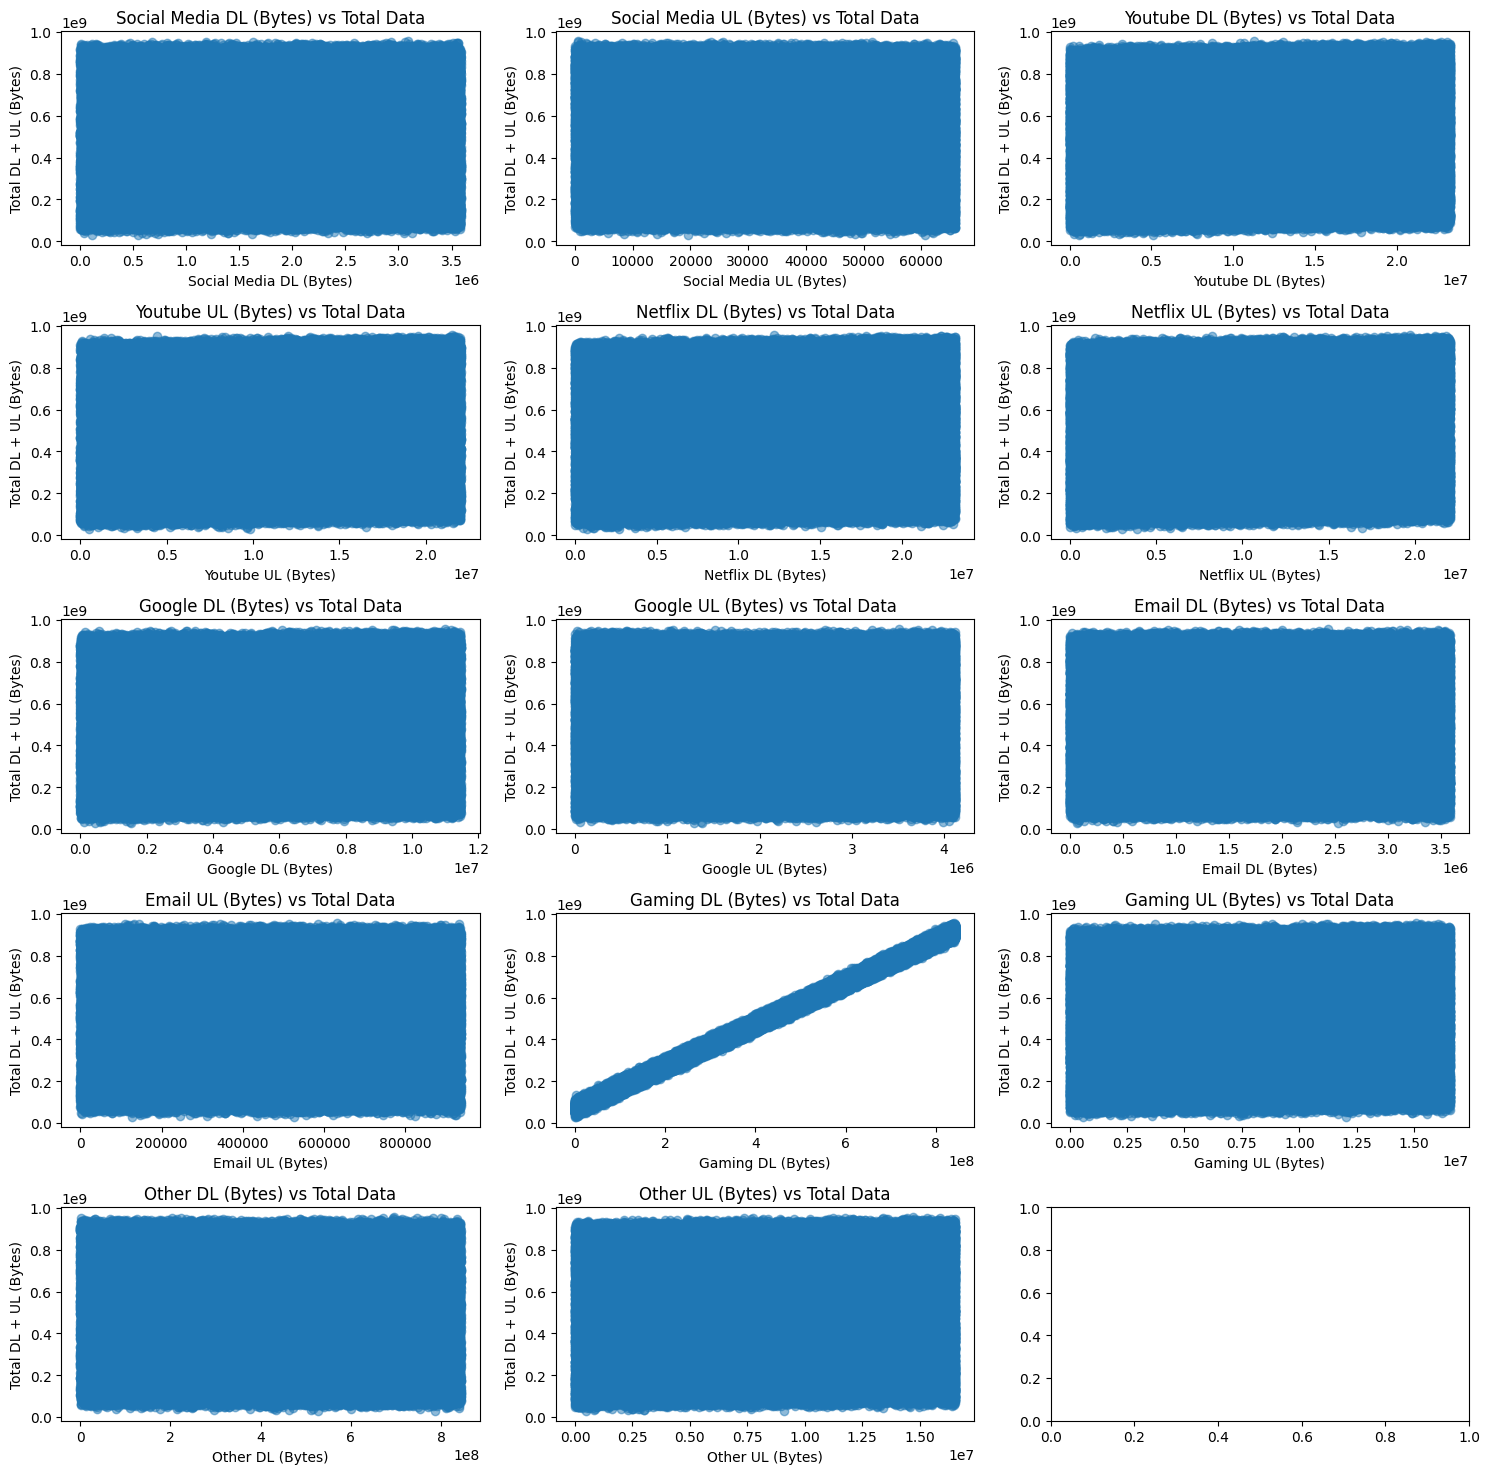

In [ ]:
# List of applications to plot against total data (DL + UL)
applications = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
                'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                'Google DL (Bytes)', 'Google UL (Bytes)',
                'Email DL (Bytes)', 'Email UL (Bytes)',
                'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
                'Other DL (Bytes)', 'Other UL (Bytes)']

# Create a new column for total data usage
df_cleaned['Total DL + UL (Bytes)'] = df_cleaned['Total DL (Bytes)'] + df_cleaned['Total UL (Bytes)']

# Plot scatter plots for each application against total data usage
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))  # Adjust size and layout

axes = axes.flatten()

for i, app in enumerate(applications):
    axes[i].scatter(df_cleaned[app], df_cleaned['Total DL + UL (Bytes)'], alpha=0.5)
    axes[i].set_title(f'{app} vs Total Data')
    axes[i].set_xlabel(app)
    axes[i].set_ylabel('Total DL + UL (Bytes)')
    
plt.tight_layout()
plt.show()


In [ ]:
import statsmodels.api as sm

# Select an example variable, such as YouTube DL
X = df_cleaned['Youtube DL (Bytes)']
y = df_cleaned['Total DL + UL (Bytes)']

# Add a constant to the independent variable (YouTube DL) for the regression model
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Display the summary of the regression analysis
print(model.summary())


                              OLS Regression Results                             
Dep. Variable:     Total DL + UL (Bytes)   R-squared:                       0.001
Model:                               OLS   Adj. R-squared:                  0.001
Method:                    Least Squares   F-statistic:                     97.01
Date:                   Fri, 06 Sep 2024   Prob (F-statistic):           7.00e-23
Time:                           09:49:27   Log-Likelihood:            -3.0858e+06
No. Observations:                 148837   AIC:                         6.172e+06
Df Residuals:                     148835   BIC:                         6.172e+06
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const 

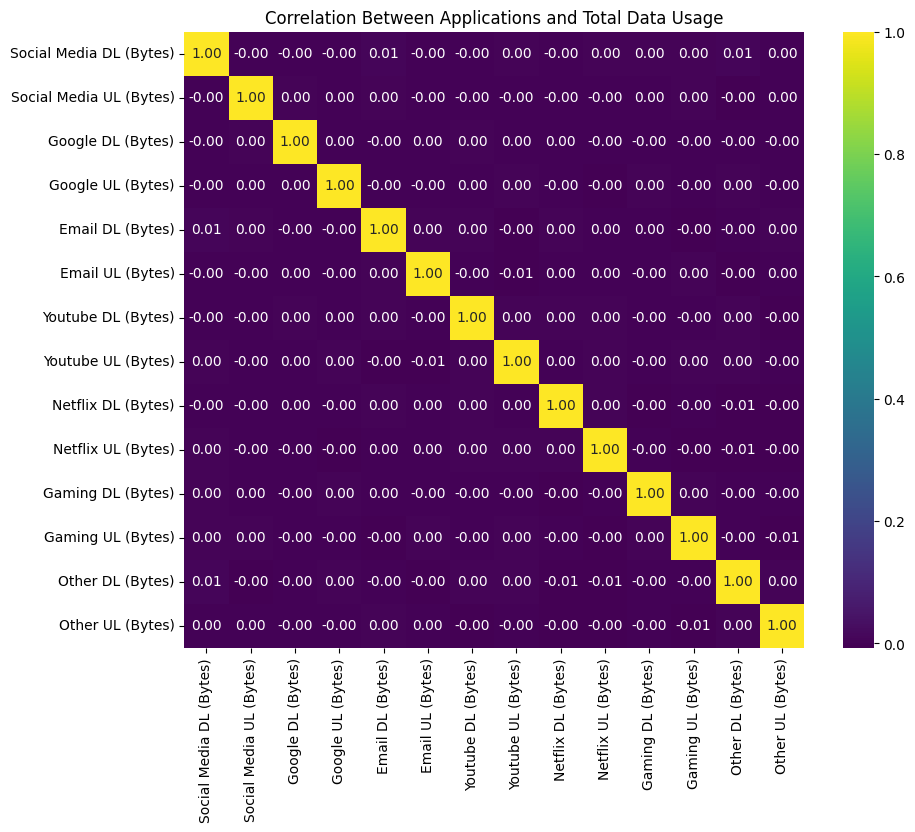

In [ ]:
# Plot the heatmap to visualize all correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Between Applications and Total Data Usage')
plt.show()


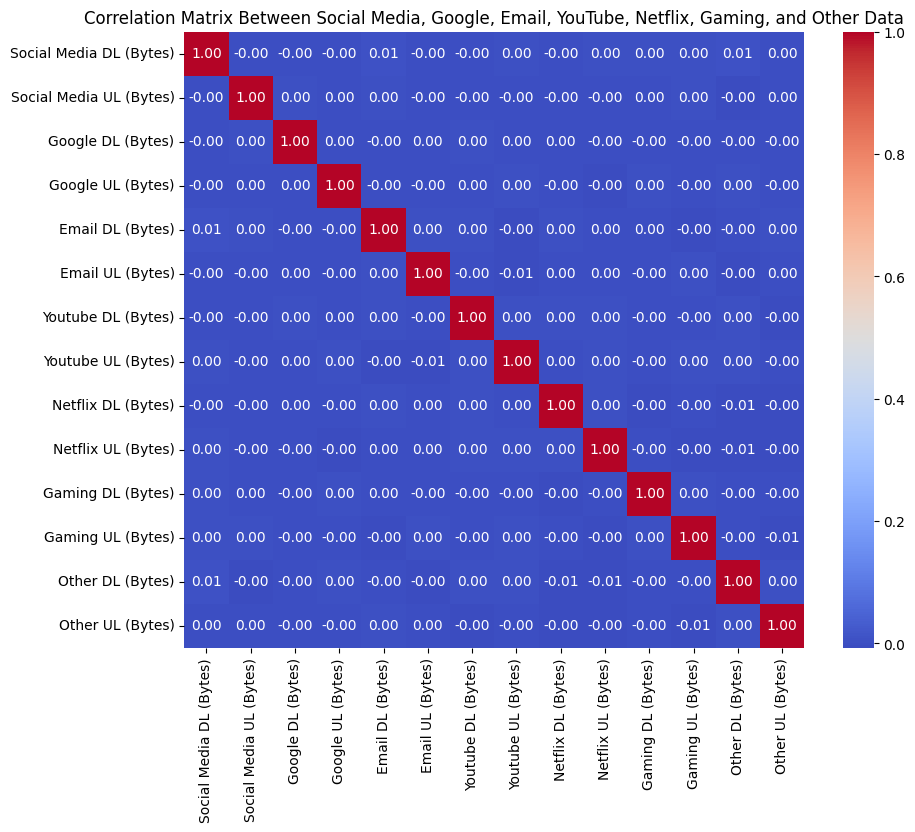

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the relevant columns for analysis
columns = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
           'Google DL (Bytes)', 'Google UL (Bytes)',
           'Email DL (Bytes)', 'Email UL (Bytes)',
           'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
           'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
           'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
           'Other DL (Bytes)', 'Other UL (Bytes)']

# Compute the correlation matrix
correlation_matrix = df_cleaned[columns].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Between Social Media, Google, Email, YouTube, Netflix, Gaming, and Other Data')
plt.show()


In [20]:
# # Save the cleaned dataset
df_cleaned.to_csv('cleaned_dataset.csv', index=False)